In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12)
import seaborn as sns
from IPython.display import display


In [2]:
filename = "../data/pima-indians-diabetes.data.csv"
columns = ['#pregnant', 'plasma_glucose', 'blood_pressure', 'skin_fold', 'serum_insulin', 
           'bmi', 'pedigree', 'age', 'class']

In [3]:
data = pd.read_csv(filename, names=columns)

In [4]:
display(data.head())
display(data.sample(5))

,#pregnant,plasma_glucose,blood_pressure,skin_fold,serum_insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,#pregnant,plasma_glucose,blood_pressure,skin_fold,serum_insulin,bmi,pedigree,age,class
408,8,197,74,0,0,25.9,1.191,39,1
649,0,107,60,25,0,26.4,0.133,23,0
273,1,71,78,50,45,33.2,0.422,21,0
574,1,143,86,30,330,30.1,0.892,23,0
36,11,138,76,0,0,33.2,0.420,35,0


In [5]:
data.shape

(768, 9)

In [6]:
data.dtypes

#pregnant           int64
plasma_glucose      int64
blood_pressure      int64
skin_fold           int64
serum_insulin       int64
bmi               float64
pedigree          float64
age                 int64
class               int64
dtype: object

In [7]:
data.describe()

,#pregnant,plasma_glucose,blood_pressure,skin_fold,serum_insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
display(data.groupby('class').sum())
display(data.groupby('class').mean())

,#pregnant,plasma_glucose,blood_pressure,skin_fold,serum_insulin,bmi,pedigree,age
class,,,,,,,,
0,1649,54990,34092,9832,34396,15152.1,214.867,15595
1,1304,37857,18981,5940,26890,9418.2,147.534,9934


,#pregnant,plasma_glucose,blood_pressure,skin_fold,serum_insulin,bmi,pedigree,age
class,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
corr = data.corr(method='pearson')
corr

,#pregnant,plasma_glucose,blood_pressure,skin_fold,serum_insulin,bmi,pedigree,age,class
#pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma_glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_fold,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
serum_insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


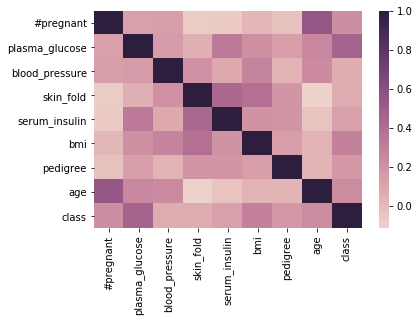

In [10]:
sns.heatmap(corr, cmap=sns.cubehelix_palette(as_cmap=True))

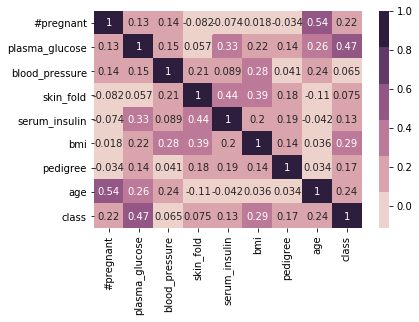

In [11]:
sns.heatmap(corr, cmap=sns.cubehelix_palette(), annot=True)

In [12]:
data.skew()

#pregnant         0.901674
plasma_glucose    0.173754
blood_pressure   -1.843608
skin_fold         0.109372
serum_insulin     2.272251
bmi              -0.428982
pedigree          1.919911
age               1.129597
class             0.635017
dtype: float64

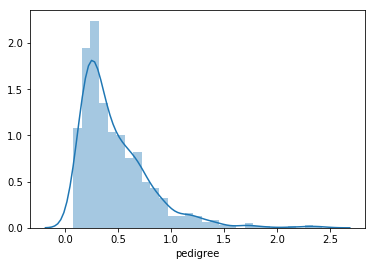

In [13]:
sns.distplot(data['pedigree'])

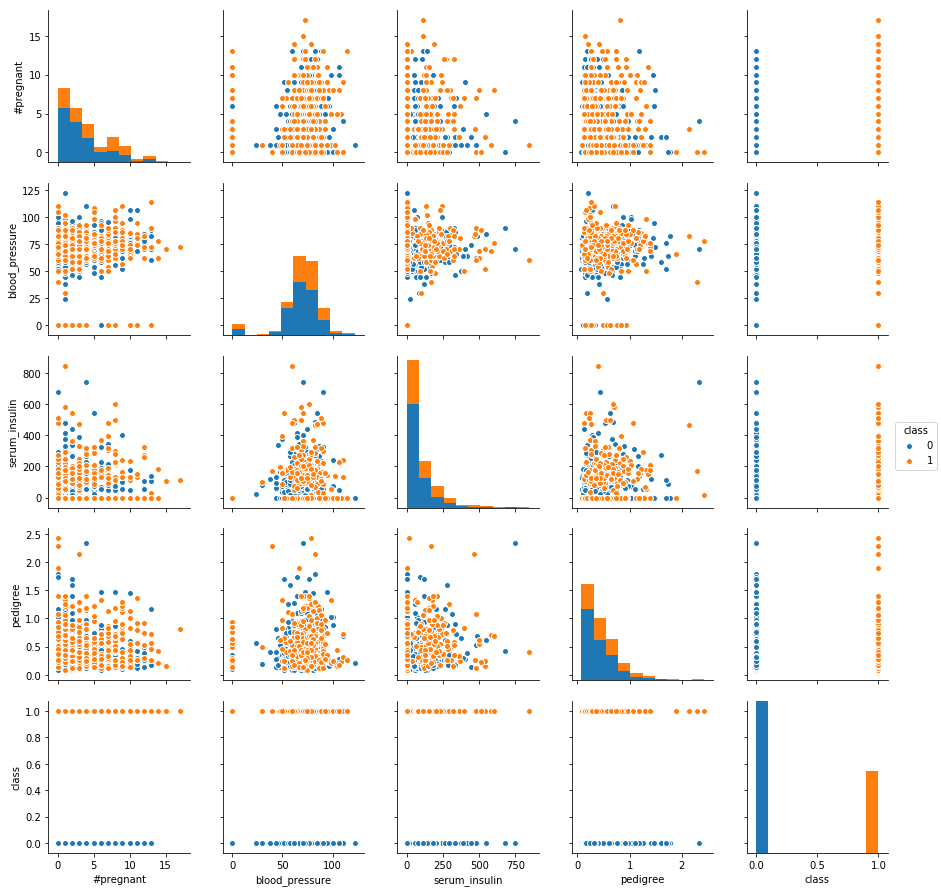

In [14]:
sns.pairplot(data[['#pregnant', 'blood_pressure', 'serum_insulin', 'pedigree', 'class']], hue="class")

In [15]:
# Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import set_printoptions
set_printoptions(precision=3)

In [16]:
array = data.values
X = array[:,0:8]
Y = array[:,8]

In [17]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
print(fit.scores_)

[  111.52   1411.887    17.605    53.108  2175.565   127.669     5.393
   181.304]


In [18]:
# Recursive Feature Elimination

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [20]:
model = LogisticRegression() # Model does not matter much
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)

In [21]:
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [ True  True  True False False  True  True False]
Feature Ranking: [1 1 1 3 4 1 1 2]


In [22]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
fit = pca.fit(X)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [ 0.889  0.062  0.026  0.013  0.007]
[[ -2.022e-03   9.781e-02   1.609e-02   6.076e-02   9.931e-01   1.401e-02
    5.372e-04  -3.565e-03]
 [ -2.265e-02  -9.722e-01  -1.419e-01   5.786e-02   9.463e-02  -4.697e-02
   -8.168e-04  -1.402e-01]
 [ -2.246e-02   1.434e-01  -9.225e-01  -3.070e-01   2.098e-02  -1.324e-01
   -6.400e-04  -1.255e-01]
 [ -4.905e-02   1.198e-01  -2.627e-01   8.844e-01  -6.555e-02   1.928e-01
    2.699e-03  -3.010e-01]
 [  1.516e-01  -8.794e-02  -2.322e-01   2.600e-01  -1.723e-04   2.147e-02
    1.641e-03   9.205e-01]]


In [56]:
# Feature importance using Random forest
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[ 0.109  0.223  0.108  0.079  0.071  0.147  0.123  0.14 ]


In [57]:
# Train-Test split

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
# model = LogisticRegression()
model = ExtraTreesClassifier(max_depth=100)
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 66.883%


In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=1287)
model = ExtraTreesClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 72.526% (5.948%)


In [28]:
cross_val_score?

In [58]:
# Matrices

In [61]:
a = np.array([1, 2, 3])
print(a)
# define second vector
b = np.array([1, 2, 3]) 
print(b)
# add vectors 
c=a+b
print(c)

[1 2 3]
[1 2 3]
[2 4 6]


In [62]:
a*b

array([1, 4, 9])

In [63]:
a/b

array([1, 1, 1])

In [64]:
np.dot(a, b)

14

In [66]:
a * 2.5

array([ 2.5,  5. ,  7.5])

In [68]:
from numpy.linalg import norm
# L1 norm
norm(a, 1)

6.0

In [70]:
# L2 Norm
norm(a, 2)

3.7416573867739413

In [71]:
# Linf norm
norm(a, np.inf)

3.0

In [74]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2, 3], [4, 5, 6]])

In [75]:
A + B

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [76]:
A - B

array([[0, 0, 0],
       [0, 0, 0]])

In [77]:
# Hadamard Product
A * B

array([[ 1,  4,  9],
       [16, 25, 36]])

In [80]:
np.dot(A.T, B)

array([[17, 22, 27],
       [22, 29, 36],
       [27, 36, 45]])

In [82]:
A.T.shape, B.shape

((3, 2), (2, 3))

In [84]:
A.shape, B.T.shape

((2, 3), (3, 2))

In [95]:
C = [[17, 22, 27],
     [22, 29, 36],
     [27, 36, 45]]

In [96]:
np.trace(C)

91

In [97]:
np.linalg.det(C)

0.0